## Info 2
# Color segmentation


https://realpython.com/python-opencv-color-spaces/

---


In [27]:
 import cv2

In [28]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

346

In [29]:
flags[40]
#The first characters after COLOR_ indicate the origin color space,
#and the characters after the 2 are the target color space
#This flag represents a conversion from BGR (Blue, Green, Red) to RGB. 
#As you can see, the two color spaces are very similar, with only the first and last channels swapped.

'COLOR_BAYER_GR2GRAY'

In [30]:
import matplotlib.pyplot as plt
import numpy as np

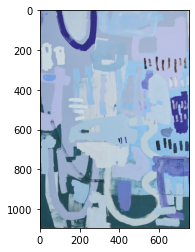

In [31]:
AH1 = cv2.imread(path + 'AH01.jpg')
plt.imshow(AH1)
plt.show()

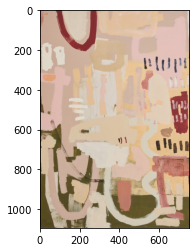

In [32]:
AH1 = cv2.cvtColor(AH1, cv2.COLOR_BGR2RGB)
plt.imshow(AH1)
plt.show()

In [33]:
type(AH1)

numpy.ndarray

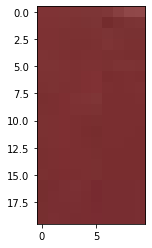

In [34]:
cut_AH1=AH1[0:20,90:100]
plt.imshow(cut_AH1)
plt.show()

In [35]:
print(cut_AH1)

[[[127  51  53]
  [127  51  53]
  [126  52  53]
  [126  52  53]
  [125  53  54]
  [125  53  54]
  [127  55  56]
  [135  63  64]
  [143  71  72]
  [144  72  73]]

 [[126  50  52]
  [126  50  52]
  [125  51  52]
  [124  50  51]
  [123  51  52]
  [124  52  53]
  [116  44  45]
  [120  48  49]
  [123  51  52]
  [124  52  53]]

 [[125  49  51]
  [125  49  51]
  [123  49  50]
  [123  49  50]
  [123  49  50]
  [124  50  51]
  [124  52  53]
  [122  50  51]
  [121  49  50]
  [121  49  50]]

 [[125  49  51]
  [125  49  51]
  [123  49  50]
  [122  48  49]
  [122  48  49]
  [123  49  50]
  [126  52  53]
  [124  50  51]
  [122  48  49]
  [122  48  49]]

 [[125  51  52]
  [124  50  51]
  [124  48  50]
  [123  47  49]
  [124  48  50]
  [124  48  50]
  [122  48  49]
  [122  48  49]
  [121  47  48]
  [121  47  48]]

 [[125  51  52]
  [125  51  52]
  [125  49  51]
  [124  48  50]
  [125  49  51]
  [125  49  51]
  [123  49  50]
  [125  51  52]
  [125  51  52]
  [124  50  51]]

 [[124  50  51]
  [124  50  

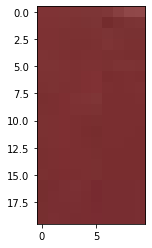

In [36]:
plt.imshow(AH1[0:20,90:100])

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

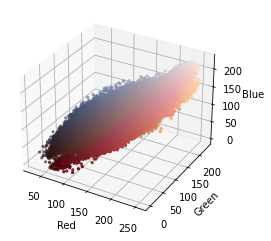

In [38]:
r, g, b = cv2.split(AH1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = AH1.reshape((np.shape(AH1)[0]*np.shape(AH1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

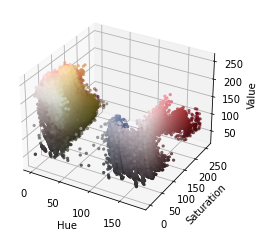

In [39]:
hsv_AH1 = cv2.cvtColor(AH1, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_AH1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [40]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [41]:
from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) /255.   # normalization - range [0 - 1]
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) /255.

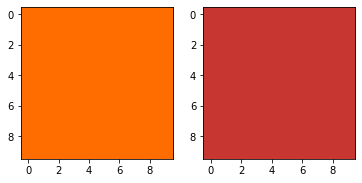

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [43]:
mask = cv2.inRange(hsv_AH1, light_orange, dark_orange)

In [44]:
result = cv2.bitwise_and(AH1, AH1, mask=mask)

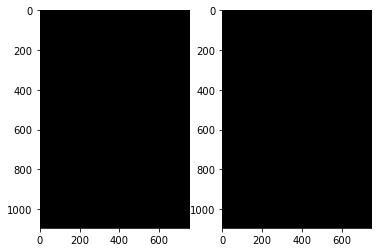

In [45]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [46]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

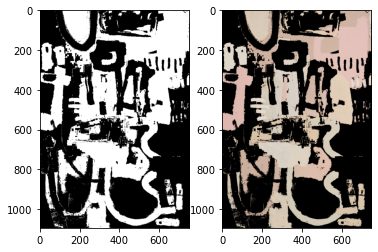

In [47]:
mask_white = cv2.inRange(hsv_AH1, light_white, dark_white)
result_white = cv2.bitwise_and(AH1, AH1, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

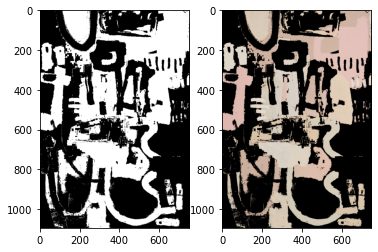

In [48]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(AH1, AH1, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [49]:
# you can use a Gaussian blur to tidy up the small false detections.

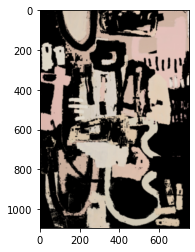

In [50]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

In [51]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 8.3.1


JPEG
(750, 1094)
RGB


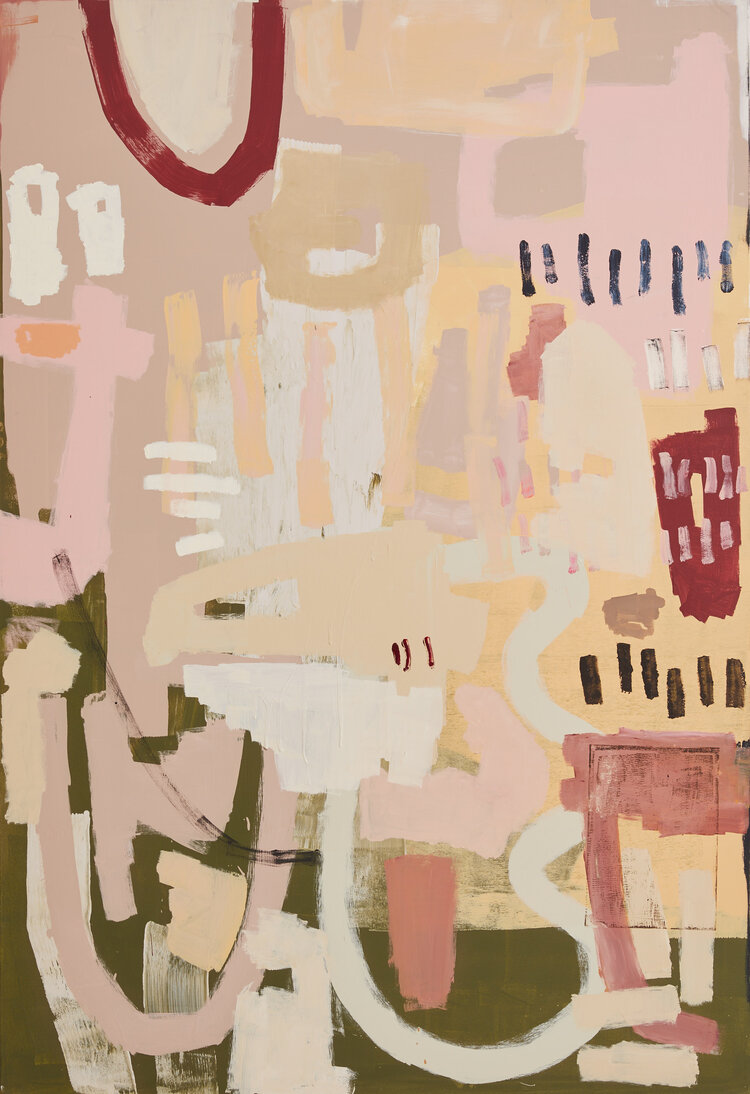

In [52]:
from PIL import Image

# Open the image form working directory
image = Image.open( path + 'AH01.jpg')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
image.show()

In [53]:
# load the image
image = Image.open( path + 'AH01.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)


<class 'numpy.ndarray'>
(1094, 750, 3)
<class 'PIL.Image.Image'>
RGB
(750, 1094)


In [54]:
data[0,0,0]

176

In [55]:
print(data)

[[[176 107  91]
  [179 107  92]
  [178 106  92]
  ...
  [208 197 193]
  [213 202 198]
  [202 188 187]]

 [[182 109  94]
  [181 108  93]
  [179 105  92]
  ...
  [206 197 192]
  [212 201 197]
  [203 189 188]]

 [[182 106  92]
  [182 106  92]
  [180 106  93]
  ...
  [204 195 190]
  [211 200 196]
  [201 190 188]]

 ...

 [[ 97  73  35]
  [106  84  45]
  [114  92  53]
  ...
  [112  98  53]
  [120 106  59]
  [118 104  57]]

 [[ 96  73  31]
  [ 96  73  32]
  [106  84  45]
  ...
  [111  97  52]
  [112  98  51]
  [119 105  56]]

 [[ 93  71  30]
  [ 92  70  29]
  [ 97  77  40]
  ...
  [116  99  53]
  [110  93  47]
  [120 104  55]]]


In [56]:
import numpy as np
from PIL import Image

im = np.array(Image.open( path + 'AH01.jpg').convert('L')) #you can pass multiple arguments in single line
print(type(im))

gr_im= Image.fromarray(im).save(path + 'gr_AH01.png')

<class 'numpy.ndarray'>


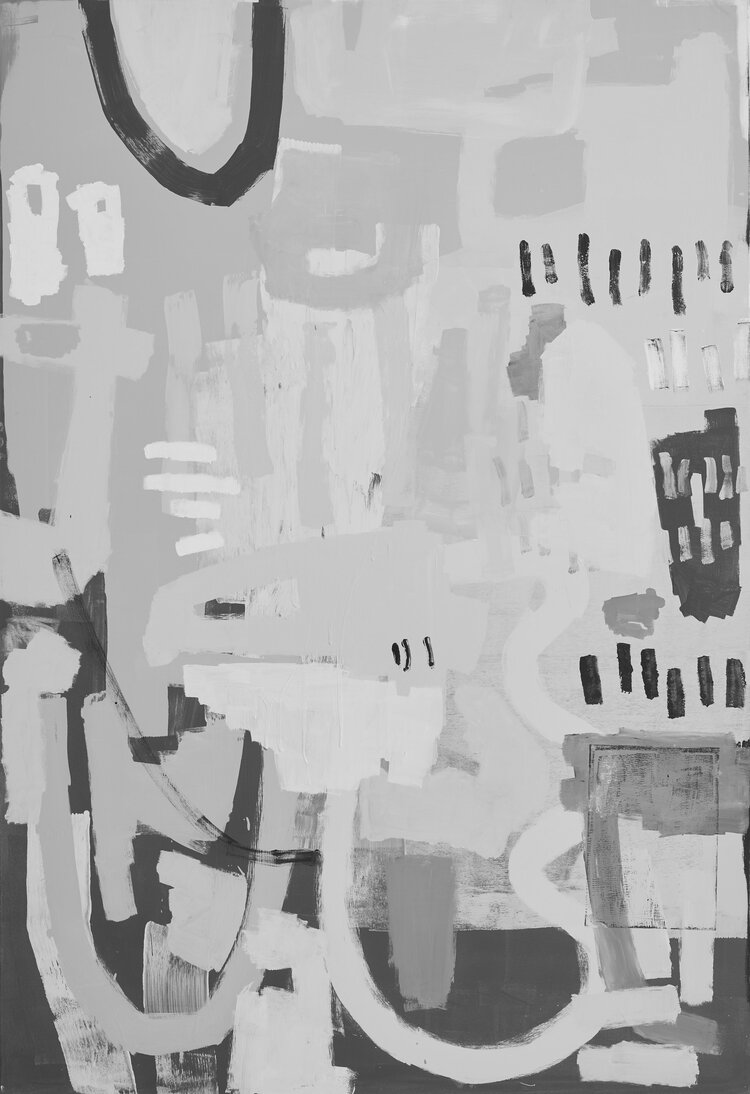

In [57]:
Image.open( path + 'AH01.jpg').convert('L')

In [58]:
load_img_rz = np.array(Image.open( path + 'AH01.jpg').resize((200,200)))
Image.fromarray(load_img_rz).save( path + 'r_AH01.jpg')
print("After resizing:",load_img_rz.shape)


After resizing: (200, 200, 3)


In [59]:
im = np.array(Image.open(path + 'AH01.jpg'))

print("Before trimming:",im.shape)

im_trim = im[128:384, 128:384]
print("After trimming:",im_trim.shape)

Image.fromarray(im_trim).save( path + 'trim_AH01.jpg')

Before trimming: (1094, 750, 3)
After trimming: (256, 256, 3)


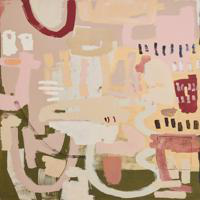

In [60]:
Image.open(path + 'r_AH01.jpg')

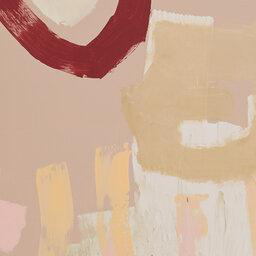

In [61]:
Image.open(path + 'trim_AH01.jpg')

In [62]:
#!conda install -c anaconda keras
#!pip install tensorflow

# done on the shell

2022-07-31 17:39:29.385492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dsc/anaconda3/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-31 17:39:29.385514: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(750, 1094)


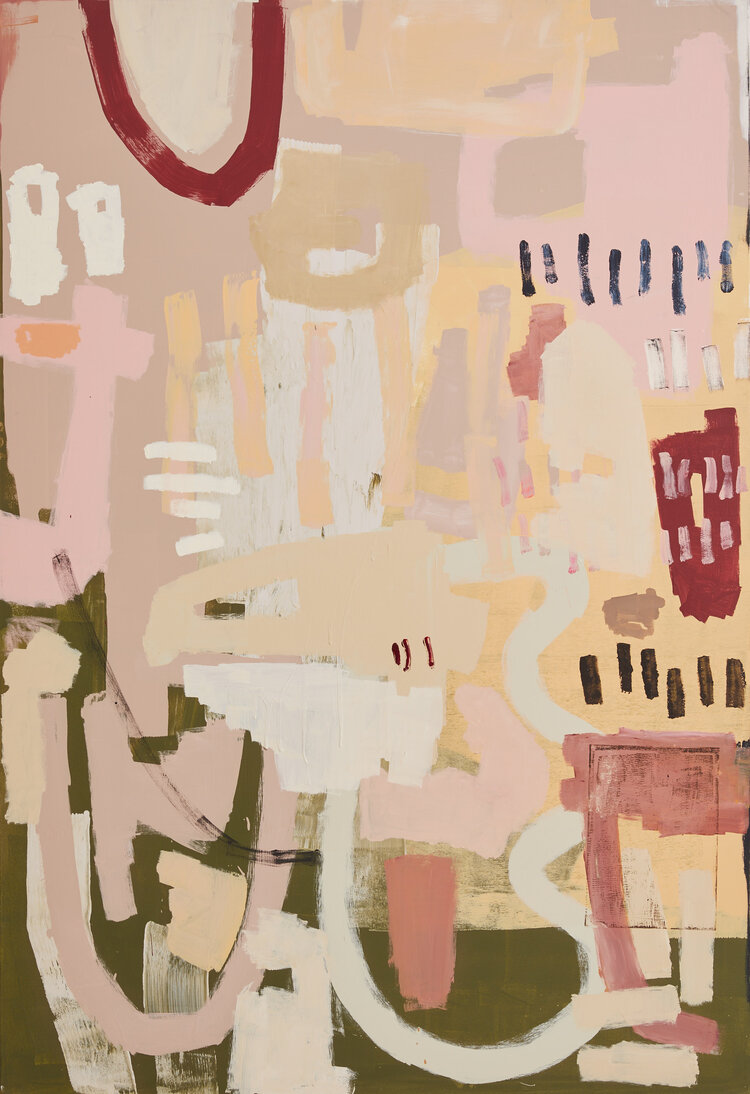

In [63]:
#from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img

import warnings

# load the image
img = load_img( path + 'AH01.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

In [64]:
# example of converting an image with the Keras API
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img

# load the image
img = load_img( path + 'AH01.jpg')
print("Orignal:" ,type(img))

# convert to numpy array
img_array = img_to_array(img)
print("NumPy array info:") 
print(type(img_array))    

print("type:",img_array.dtype)
print("shape:",img_array.shape)
# convert back to image

img_pil = array_to_img(img_array)
print("converting NumPy array:",type(img_pil))

Orignal: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (1094, 750, 3)
converting NumPy array: <class 'PIL.Image.Image'>


<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
RGB
(750, 1094)


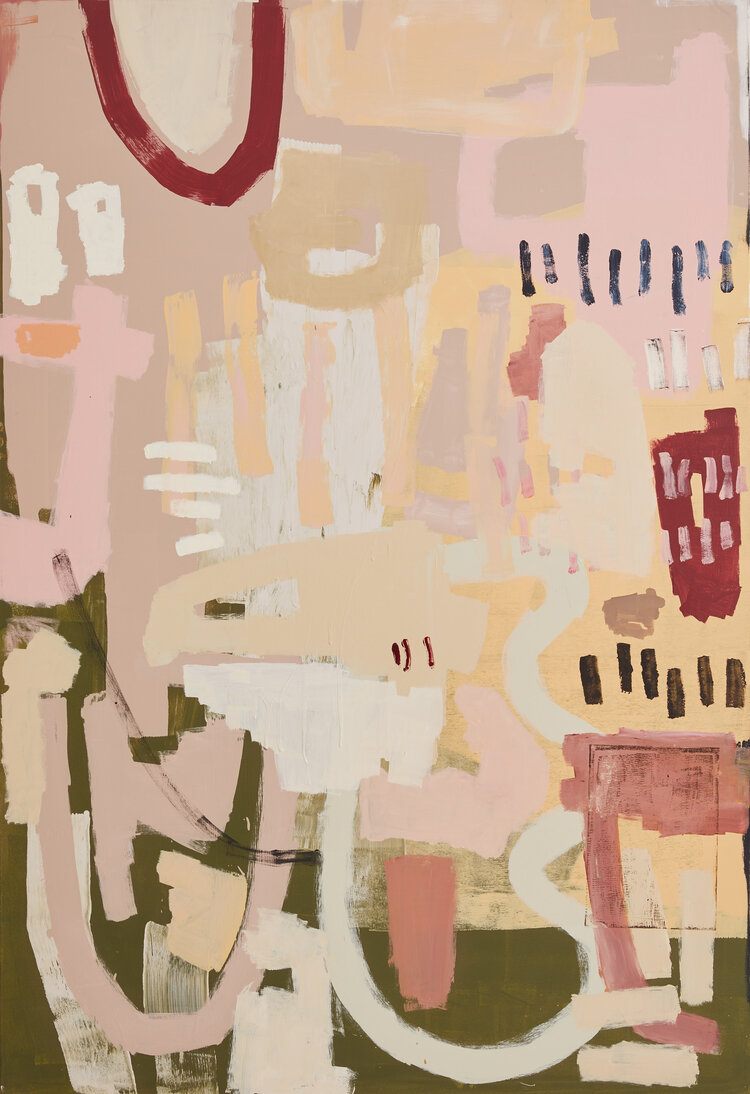

In [65]:
# example of saving an image with the Keras API
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img
# save the image with a new filename
save_img(path + 'Keras_AH01.png', img_array)
# load the image to confirm it was saved correctly
img = load_img(path + 'Keras_AH01.png')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
img.show()

## Info 3
# Clustering
---

In [66]:
from sklearn import datasets
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
%matplotlib inline

In [67]:
!pip install opencv-python

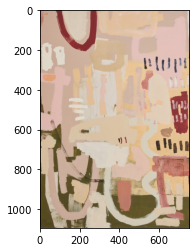

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread(path + 'AH01.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [69]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

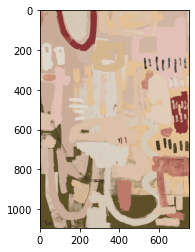

In [70]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 20
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)



In [71]:
type(segmented_data)

numpy.ndarray

In [72]:
segmented_data.shape

(820500, 3)

In [73]:
segmented_data[0]

array([166,  97,  84], dtype=uint8)

# Info 4

# Inpainting
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_photo/py_inpainting/py_inpainting.html

A few months ago, I watched a video on Content-Aware Fill, an advanced inpainting technique used in Adobe Photoshop. On further search, I was able to find that same technique is already there in GIMP with different name, “Resynthesizer” (You need to install separate plugin). I am sure you will enjoy the technique.

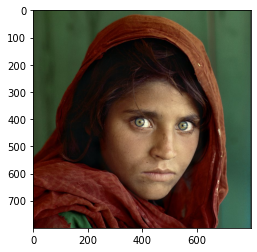

In [74]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
path='./data/'

img = cv2.imread(path + 'nat_geo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#mask = cv2.imread(path + 'mask_nat_geo.jpg',0)
plt.imshow(img)
plt.show()

In [75]:
img.shape

(800, 800, 3)

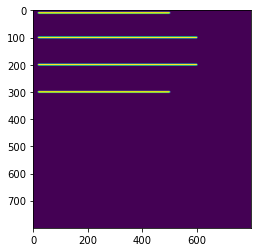

In [76]:

mask= np.zeros((800, 800, 1), dtype = "uint8")

mask = cv2.line(mask,  (20,10), (500,10), (255,255,255), 5)
mask = cv2.line(mask, (20,100), (600,100), (255,255,255), 5)
mask = cv2.line(mask, (20,200), (600,200), (255,255,255), 5)
mask = cv2.line(mask, (20,300), (500,300), (255,255,255), 5)

plt.imshow(mask)
plt.show()

In [77]:
mask.shape

(800, 800, 1)

In [ ]:
dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to target thread (0x5643d16539a0)

QObject::moveToThread: Current thread (0x5643d16539a0) is not the object's thread (0x5643dfd05910).
Cannot move to tar